In [58]:
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [59]:

#time which we want to analyze
Y=7. # number of years
dY=52. # intervals of years (supposing equal onboarding probability throughout the year)

#Average € per investors
T=10000 #average € investment per company
tokenscale=1000000 #resize € scale
Threshold=5000000/tokenscale #initial tokens
Goal =400 #Threshold of companies in a field

In [72]:
#stuff needed for the program to run

S=int(Y*dY) # number of steps
Years=[0]*S
#N=[0]*S
# Inv=[0]*S #new investors
# InvTot=[0]*(S+2)  #total investors
rev=[0]*S #Total revenue
for t in range(0,S):
    Years[t]=t/dY

def show(InvTot):
     return plot(InvTot[S+1],InvTot[S], marker="o", markersize=5 )#,axvline(x=InvTot[S+1], ymin=0.0, ymax=Goal)

In [73]:
#N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
def model(ind):
    #introduce delay
    Delay=1+int(ind[2]*dY)
    #clean new arrays
    Inv=[0]*S #new investors
    InvTot=[0]*(S+2) #Total investors per time
    N=[0]*S #Number of total companies remaining
    #initialize them
    N[Delay-1]=ind[0]*ind[1] # the possible inverstors are the percentage on the total companies
    Inv[0]=0
    R=ind[1]/5  #we assume investors decide in the first 5 years equally distributed 
    #Delay=1+int(ind[2]*dY)
    #print(Delay)
    for t in range(Delay,S):
        #R=R+(randn()/50000)     ## uncomment to add fluctuations
        Inv[t]=N[t-1]*R
        InvTot[t]=(InvTot[t-1] + Inv[t])   
        N[t]=(N[t-1] - Inv[t]) 
        rev[t]=InvTot[t]*(T/tokenscale) +rev[t]
#When do we reach the goal of investors in each industry?        
        if InvTot[t] <= Goal:  
            InvTot[S]=InvTot[t]
            InvTot[S+1]=t/dY 
    show(InvTot)        
    return InvTot #number of total investors per period of time

In [74]:
#Manual data input

#Industry     #      Investors ,    %    ,  onboaring delay (Years)

Juice      =       [   5000    ,   1/10  ,   0.    ]
Soy        =       [   7000    ,   1/10  ,   1.    ]
Fish       =       [   12000   ,   1/10  ,   2.0  ]

Cacao      =       [   5000    ,   1/10   ]
PetFood    =       [   5000    ,   1/10   ]
Eggs       =       [   5000    ,   1/10   ]
Coffee     =       [   5000    ,   1/10   ]
Fruits     =       [   5000    ,   1/10   ]
Vegetables =       [   5000    ,   1/10   ]
Potato     =       [   5000    ,   1/10   ]
Rice       =       [   5000    ,   1/10   ]
Chef       =       [   5000    ,   1/30   ]
OliveOil   =       [   10000   ,   1/10   ]




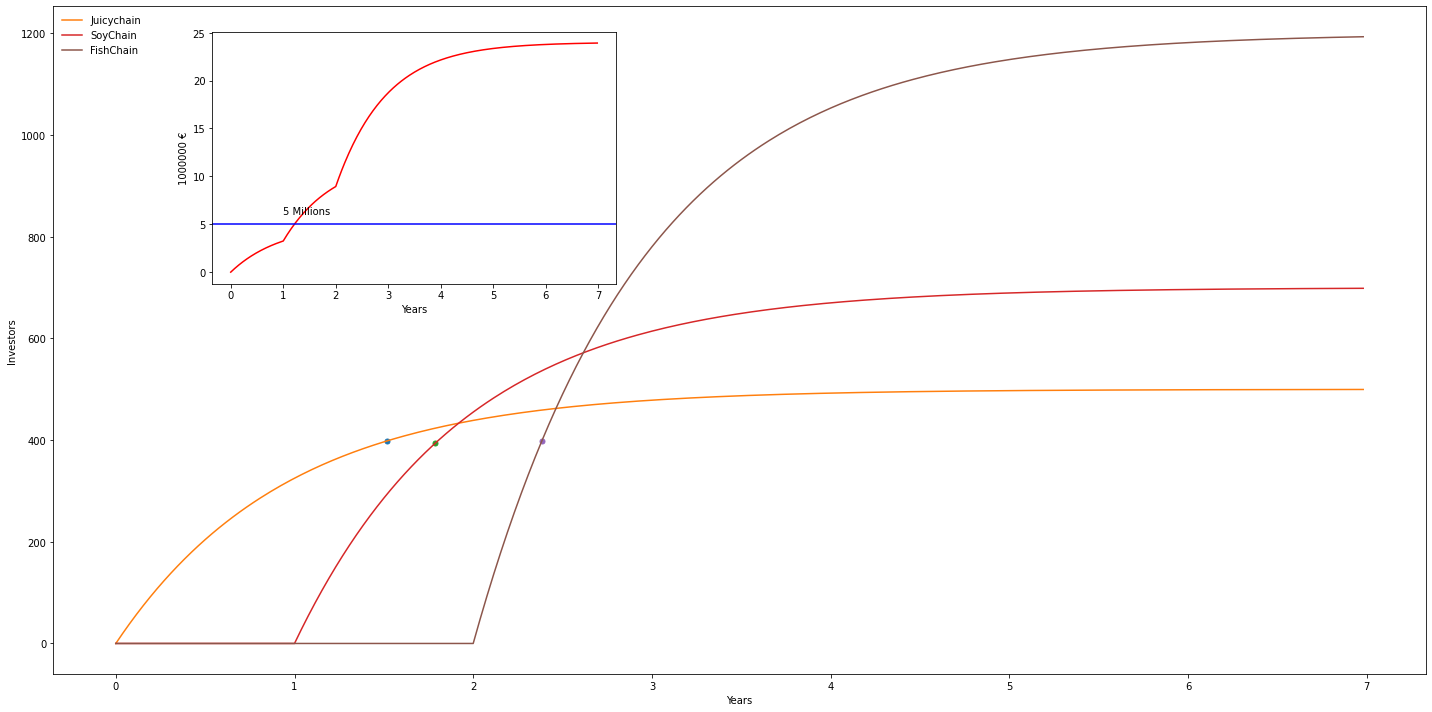

In [75]:
rev=[0]*S
fig=figure(figsize=(20,10))
#ylim(0.0,1000)

JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" )
#show()

SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain")
#show()

FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain")
#show()

# OliveOilChain=model(OliveOil)
# plot(Years, OliveOilChain[0:-2], label="OliveOilChain")
# show()

xlabel("Years")
ylabel("Investors")
legend(frameon=False)


axes=fig.add_axes([0.15, 0.6, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()

In [76]:
# CacaoChain=model(Cacao)
# plot(Years, CacaoChain[0:-2], label="CacaoChain")
# show()

# PetChain=model(PetFood)
# plot(Years, PetChain[0:-2], label="PetChain")
# show()

# EggChain=model(Eggs)
# plot(Years, EggChain[0:-2], label="EggChain")
# show()

# CoffeeChain=model(Coffee)
# plot(Years, CoffeeChain[0:-2], label="CoffeeChain")
# show()

# EggChain=model(Fruits)
# plot(Years, ChefChain[0:-2], label="EggChain")
# show()

# VegChain=model(Vegetables)
# plot(Years, ChefChain[0:-2], label="VegChain")
# show()

# PotatoChain=model(Potato)
# plot(Years, ChefChain[0:-2], label="PotatoChain")
# show()

# RiceChain=model(Rice)
# plot(Years, ChefChain[0:-2], label="RiceChain")
# show()

# ChefChain=model(Chef)
# plot(Years, ChefChain[0:-2], label="ChefChain")
# show()

In [174]:


###########make this but time delayed for some other companies

###########different scenarios (?)

############chiamare cat e chiedergli dei dati su quante aziende ci sono per settore

############show the curve lmao

 

In [ ]:
#scenario 1 (WCS): Only Juice industry joins (uniformly in 5 years)

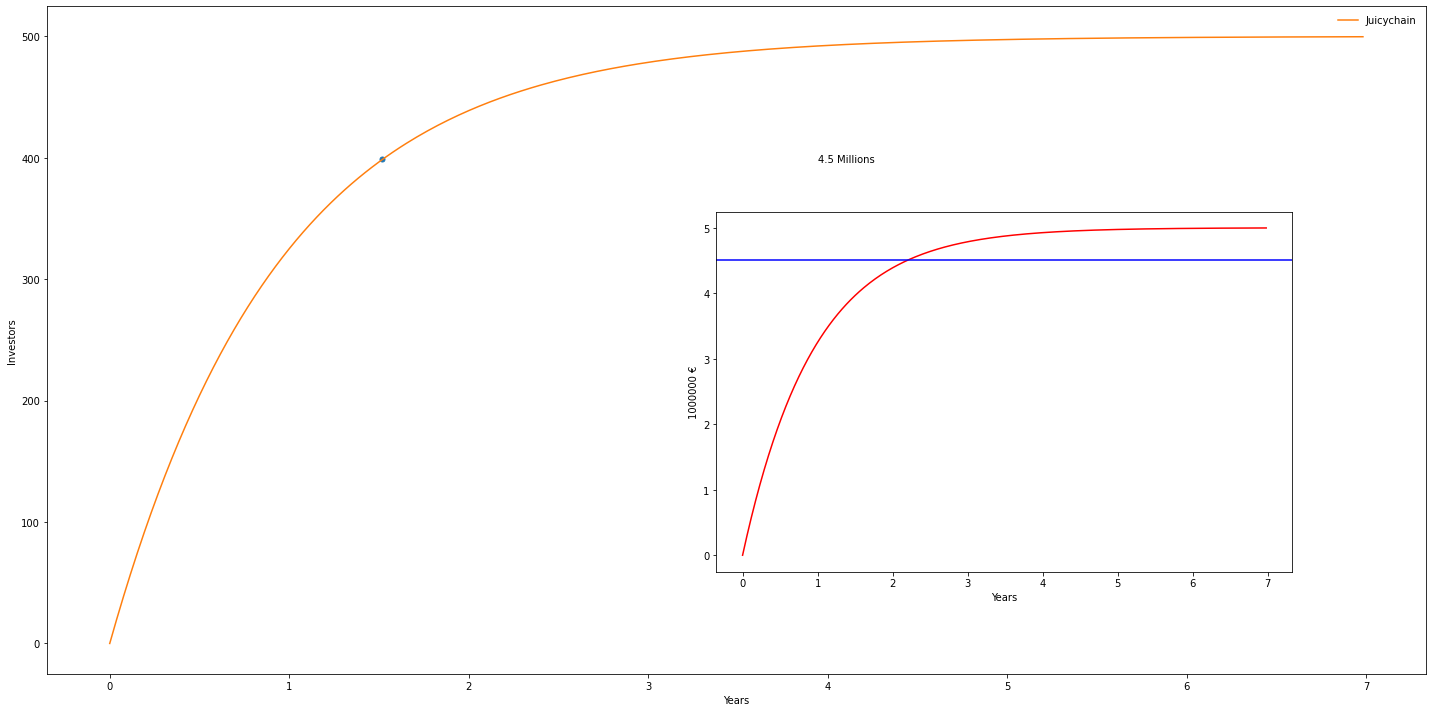

In [86]:
Juice      =       [   5000    ,   1/10  ,   0.    ]
rev=[0]*S
fig=figure(figsize=(20,10))
#ylim(0.0,1000)

JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" )

xlabel("Years")
ylabel("Investors")
legend(frameon=False)

axes=fig.add_axes([0.50, 0.2, 0.4, 0.5])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold*(1-Juice[1]),color='b')
axes.text(1.,Threshold +1,'4.5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()

In [ ]:
# scenario 2 (Base): 

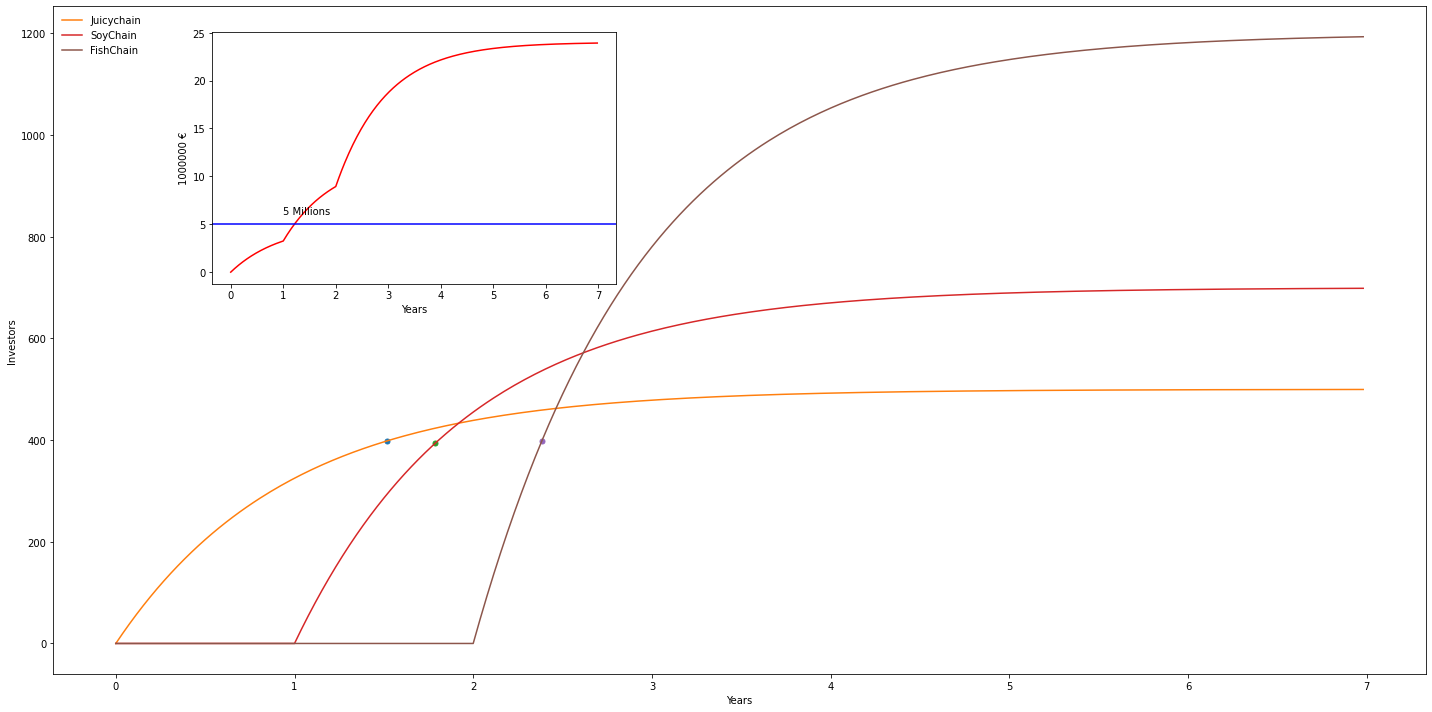

In [87]:
rev=[0]*S
fig=figure(figsize=(20,10))
JuicyChain=model(Juice)
plot(Years, JuicyChain[0:-2] , label="Juicychain" )
SoyChain=model(Soy)
plot(Years, SoyChain[0:-2], label="SoyChain")
FishChain=model(Fish)
plot(Years, FishChain[0:-2], label="FishChain")
xlabel("Years")
ylabel("Investors")
legend(frameon=False)
axes=fig.add_axes([0.15, 0.6, 0.28, 0.35])
axes.plot(Years, rev, color='r')
axes.axhline(y=Threshold,color='b')
axes.text(1.,Threshold +1,'5 Millions')
xlabel("Years")
ylabel(str(tokenscale)+" €")
tight_layout()